In [ ]:
import numpy as np
from spec_id import Single_gal_fit, Analyze_Stack_avgage, Likelihood_contours, Gauss_dist,Error, Scale_model,\
    Best_fit_model, Single_gal_fit_cont,Single_gal_fit_full, B_factor, Analyze_Stack_avgage_cont_feat, Highest_likelihood_model_galaxy,\
    Analyze_Stack_avgage_cont_feat_combine,Analyze_Stack_avgage_cont_feat_gal_age_correct
import matplotlib.pyplot as plt
from matplotlib import gridspec
from vtl.Readfile import Readfile
from glob import glob
from astropy.io import fits, ascii
from astropy.table import Table
from scipy.interpolate import interp1d,interp2d
import os
import cPickle
import seaborn as sea
sea.set(style='white')
sea.set(style='ticks')
sea.set_style({"xtick.direction": "in","ytick.direction": "in"})
colmap = sea.cubehelix_palette(12, start=2, rot=.2, dark=0, light=1.1, as_cmap=True)

In [ ]:
ids,speclist,lmass,rshift,rad,sig,comp=np.array(Readfile('masslist_mar22.dat',is_float=False))
lmass,rshift,rad,sig,comp=np.array([lmass,rshift,rad,sig,comp]).astype(float)

IDc=[]  # compact sample
IDd=[]  # diffuse sample

IDmL=[]  # low mass sample
IDmH=[]  # high mass sample

for i in range(len(ids)):
    if 0.11 < comp[i]:
        IDd.append(i)
    if 0.11 > comp[i]:
        IDc.append(i)
    if 10.931 > lmass[i]:
        IDmL.append(i)
    if 10.931 < lmass[i]:
        IDmH.append(i)
        

metal=np.arange(0.002,0.031,0.001)
age=np.arange(.5,6.1,.1)
tau=[0,8.0, 8.3, 8.48, 8.6, 8.7, 8.78, 8.85, 8.9, 8.95, 9.0, 9.04, 9.08, 9.11, 9.15, 9.18, 9.2, 9.23, 9.26, 9.28,
     9.3, 9.32, 9.34, 9.36, 9.38, 9.4, 9.41, 9.43, 9.45, 9.46, 9.48]
M,A=np.meshgrid(metal,age)

In [6]:
print ids[IDc]
print '------'
print ids[IDd]

['n16758' 'n21156' 'n37686' 's39012' 's39170' 's39241' 's39804' 's40597'
 's41520' 's46066']
------
['n14713' 'n21427' 'n23435' 'n32566' 'n34694' 's35774' 's38785' 's39631'
 's39805' 's40862' 's42221' 's44620' 's45972' 's47677' 's48631']


In [ ]:
def Plot_LH(Pr,bfmetal,bfage,save_plot=False,plot_name=''):
    onesig,twosig=Likelihood_contours(age,metal,Pr)
    levels=np.array([twosig,onesig])
    plt.figure(figsize=[8,8])
    plt.contour(M,A,Pr,levels,colors='k',linewidths=2)
    plt.contourf(M,A,Pr,40,cmap=colmap)
    plt.plot(bfmetal,bfage,'cp',label='\nBest fit\nt=%s Gyrs\nZ=%s Z$_\odot$' % (bfage,np.round(bfmetal/0.019,2)))
    plt.xticks([0,.005,.01,.015,.02,.025,.03],np.round(np.array([0,.005,.01,.015,.02,.025,.03])/0.02,2))
    plt.tick_params(axis='both', which='major', labelsize=17)
    plt.gcf().subplots_adjust(bottom=0.16)
    plt.minorticks_on()
    plt.xlabel('Metallicity (Z$_\odot$)',fontsize=15)
    plt.ylabel('Age (Gyrs)',fontsize=15)
    plt.legend(loc=3,fontsize=14)
    
    if save_plot == True:
        plt.savefig(plot_name)
        plt.close()
    else:
        plt.show()
        plt.close()

In [3]:
%matplotlib inline

for i in range(len(ids)):
    print ids[i]
    Pr, bfage, bfmetal= Analyze_Stack_avgage_cont_feat_gal_age_correct('chidat/%s_apr6_galfit_cont_chidata.fits' % ids[i],
                                                                       'chidat/%s_apr6_galfit_feat_chidata.fits' % ids[i],
                                                                        rshift[i],np.array(tau),metal,age)    
    
    gs=gridspec.GridSpec(2,1,height_ratios=[1,1])

    onesig,twosig=Likelihood_contours(age,metal,Pr)
    levels=np.array([twosig,onesig])
    plt.figure(figsize=[16,12])
    plt.subplot(gs[0])
    plt.contour(M,A,Pr,levels,colors='k',linewidths=2)
    plt.contourf(M,A,Pr,40,cmap=colmap)
    plt.plot(bfmetal,bfage,'cp',label='\nBest fit\nt=%s Gyrs\nZ=%s Z$_\odot$' % (bfage,np.round(bfmetal/0.019,2)))
    plt.xticks([0,.005,.01,.015,.02,.025,.03],np.round(np.array([0,.005,.01,.015,.02,.025,.03])/0.02,2))
    plt.tick_params(axis='both', which='major', labelsize=17)
    plt.gcf().subplots_adjust(bottom=0.16)
    plt.minorticks_on()
    plt.xlabel('Metallicity (Z$_\odot$)',fontsize=15)
    plt.ylabel('Age (Gyrs)',fontsize=15)
    plt.title('%s, z=%s' % (ids[i],rshift[i]),fontsize=15)
    plt.legend(loc=3,fontsize=14)
    
    wv,fl,er=Readfile('spec_stacks_jan24/%s_stack.dat' % ids[i])
    wv,fl,er=np.array([wv[wv<11100],fl[wv<11100],er[wv<11100]])
    if ids[i] == 'n21427':
        IDx=[U for U in range(len(wv)) if 8550 < wv[U]]
        wv,fl,er=np.array([wv[IDx],fl[IDx],er[IDx]])
    if ids[i] == 'n37686':
        IDx=[U for U in range(len(wv)) if 7900 < wv[U]]
        wv,fl,er=np.array([wv[IDx],fl[IDx],er[IDx]])
    if ids[i] == 's42221':
        IDx=[U for U in range(len(wv)) if 7950 < wv[U]]
        wv,fl,er=np.array([wv[IDx],fl[IDx],er[IDx]])
    if ids[i] == 's46066':
        IDx=[U for U in range(len(wv)) if wv[U] < 10600]
        wv,fl,er=np.array([wv[IDx],fl[IDx],er[IDx]])

    bfm,bfa,bft=Highest_likelihood_model_galaxy(ids[i],rshift[i],bfmetal,bfage,tau)
    mwv,mfl=np.load('../../../fsps_models_for_fit/galaxy_models/m%s_a%s_t%s_z%s_%s_model.npy' % (bfm,bfa, bft, rshift[i],ids[i]))
    imfl=interp1d(mwv,mfl)(wv)
    C=Scale_model(fl,er,imfl)
    
    minlim=min(fl[1:]-er[1:])
    maxlim=max(fl[1:]+er[1:])
    
    print minlim
    print maxlim
    
    plt.subplot(gs[1])
    plt.errorbar(wv/(1+rshift[i]),fl,er,fmt='o')
    plt.plot(wv/(1+rshift[i]),imfl*C,'r')
    plt.axvline(3934.777,linestyle='--', alpha=.1)
    plt.axvline(3969.588,linestyle='--', alpha=.1)
    plt.axvline(4102.89,linestyle='--', alpha=.1)
    plt.axvline(4305.61,linestyle='--', alpha=.1)
    plt.axvline(4341.68,linestyle='--', alpha=.1)
    plt.axvline(4862.68,linestyle='--', alpha=.1)
    plt.axvline(5176.7,linestyle='--', alpha=.1)
    plt.axvspan(3910, 3979, color='k', alpha=.1)
    plt.axvspan(3981, 4030, color='k', alpha=.1)
    plt.axvspan(4082, 4122, color='k', alpha=.1)
    plt.axvspan(4250, 4400, color='k', alpha=.1)
    plt.axvspan(4830, 4930, color='k', alpha=.1)
    plt.axvspan(4862.68 - 20, 4862.68 + 20, color='r', alpha=.1)
    plt.axvspan(5109, 5250, color='k', alpha=.1)
    plt.xlim(min(wv/(1+rshift[i])),max(wv/(1+rshift[i])))
    plt.ylim(minlim,maxlim)
    plt.xlabel('Restframe wavelength',fontsize=15)
    plt.ylabel('F$_\lambda$',fontsize=15)
    plt.tick_params(axis='both', which='major', labelsize=15)
    plt.gcf().subplots_adjust(bottom=0.235)
    plt.minorticks_on()
    plt.savefig('../galaxy_lh_plots/%s_LH_bf_ac.png' % ids[i])
    plt.close()

n14713
Best fit model is 3.9 Gyr and 0.03 Z


-1.61598466158e-18


3.10096326409e-18
n16758


Best fit model is 5.4 Gyr and 0.02 Z


-9.29844315634e-19


3.02287622762e-18
n21156


Best fit model is 3.5 Gyr and 0.006 Z


1.05769352891e-19


3.22987285282e-18
n21427


Best fit model is 4.4 Gyr and 0.029 Z


-8.36936749562e-19


2.57669839884e-18
n23435


Best fit model is 4.5 Gyr and 0.003 Z


-6.94399907962e-19


2.38778573161e-18
n32566


Best fit model is 4.1 Gyr and 0.015 Z


1.35099653504e-20


3.24447197139e-18
n34694


Best fit model is 2.3 Gyr and 0.024 Z


-1.09040044664e-18


3.38399456574e-18
n37686


Best fit model is 4.7 Gyr and 0.007 Z


-2.52374782478e-19


2.59806951119e-18
s35774


Best fit model is 1.8 Gyr and 0.022 Z


-6.99637484108e-19


3.09287039558e-18
s38785


Best fit model is 4.7 Gyr and 0.003 Z


-1.08470587692e-19


2.72562378708e-18
s39012


Best fit model is 3.0 Gyr and 0.027 Z


-5.67427999941e-19


1.97021556673e-18
s39170


Best fit model is 4.9 Gyr and 0.024 Z


-5.03463284819e-20


5.12472172406e-18
s39241


Best fit model is 5.2 Gyr and 0.018 Z


-3.28393534355e-19


3.34778306018e-18
s39631


Best fit model is 5.1 Gyr and 0.007 Z


-6.93892246474e-19


4.07571045182e-18
s39804


Best fit model is 4.3 Gyr and 0.015 Z


-1.05062935078e-18


3.68158206549e-18
s39805


Best fit model is 4.5 Gyr and 0.002 Z


-6.61717323991e-19


2.02668374707e-18
s40597


Best fit model is 3.4 Gyr and 0.005 Z


-3.01378500729e-19


3.23055991684e-18
s40862


Best fit model is 4.2 Gyr and 0.012 Z


-7.94220933917e-19


3.59158932899e-18
s41520


Best fit model is 1.4 Gyr and 0.015 Z


-4.88571422238e-19


2.00389697736e-18
s42221


Best fit model is 4.0 Gyr and 0.03 Z


2.66283454762e-19


3.04391648358e-18
s44620


Best fit model is 5.4 Gyr and 0.02 Z


-5.96974341777e-19


1.91962027806e-18
s45972


Best fit model is 5.1 Gyr and 0.003 Z


-1.57039810589e-19


3.94280435328e-18
s46066


Best fit model is 4.5 Gyr and 0.027 Z


-1.07725593057e-18


4.15107981727e-18
s47677


Best fit model is 4.2 Gyr and 0.004 Z


-3.00674123296e-19


2.55493499927e-18
s48631


Best fit model is 3.5 Gyr and 0.015 Z


-1.12829870304e-18


4.81323981741e-18


In [3]:
%matplotlib inline
bf_metals=[]
bf_ages=[]

for i in range(len(ids)):
    print ids[i]
    Pr, bfage, bfmetal= Analyze_Stack_avgage_cont_feat_gal_age_correct('chidat/%s_apr6_galfit_cont_chidata.fits' % ids[i],
                                                                       'chidat/%s_apr6_galfit_feat_chidata.fits' % ids[i],
                                                                        rshift[i],np.array(tau),metal,age)    
    bf_metals.append(bfmetal)
    bf_ages.append(bfage)
single_dat=Table([ids,lmass,comp,np.round(bf_metals,3),np.round(bf_ages,1)],names=['IDS','lmass','compactness','Best_fit_Z','Best_fit_t'])
ascii.write(single_dat,'galaxy_measurments_apr11.dat')

n14713
Best fit model is 3.6 Gyr and 0.03 Z


n16758
Best fit model is 5.2 Gyr and 0.021 Z


n21156
Best fit model is 3.5 Gyr and 0.006 Z


n21427
Best fit model is 4.1 Gyr and 0.03 Z


n23435
Best fit model is 4.1 Gyr and 0.004 Z


n32566
Best fit model is 3.8 Gyr and 0.015 Z


n34694
Best fit model is 2.3 Gyr and 0.024 Z


n37686
Best fit model is 4.4 Gyr and 0.008 Z


s35774
Best fit model is 1.8 Gyr and 0.022 Z


s38785
Best fit model is 4.2 Gyr and 0.004 Z


s39012
Best fit model is 2.7 Gyr and 0.027 Z


s39170
Best fit model is 4.7 Gyr and 0.024 Z


s39241
Best fit model is 4.9 Gyr and 0.018 Z


s39631
Best fit model is 4.7 Gyr and 0.008 Z


s39804
Best fit model is 4.0 Gyr and 0.016 Z


s39805
Best fit model is 3.4 Gyr and 0.03 Z


s40597
Best fit model is 3.4 Gyr and 0.005 Z


s40862
Best fit model is 3.9 Gyr and 0.013 Z


s41520
Best fit model is 1.4 Gyr and 0.015 Z


s42221
Best fit model is 3.9 Gyr and 0.03 Z


s44620
Best fit model is 4.9 Gyr and 0.024 Z


s45972
Best fit model is 4.9 Gyr and 0.003 Z


s46066
Best fit model is 4.1 Gyr and 0.029 Z


s47677
Best fit model is 4.0 Gyr and 0.004 Z


s48631
Best fit model is 3.3 Gyr and 0.015 Z

n16758
0.019

 5.6 0


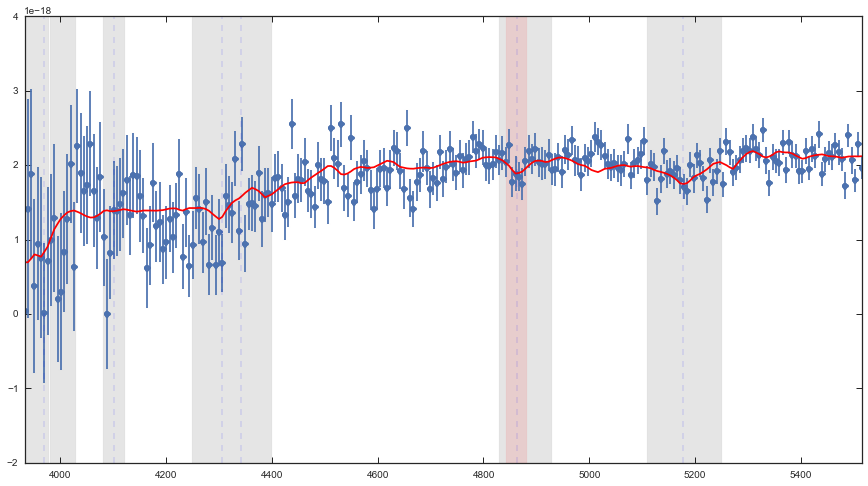

n21156
0.012

 3.3 8.7


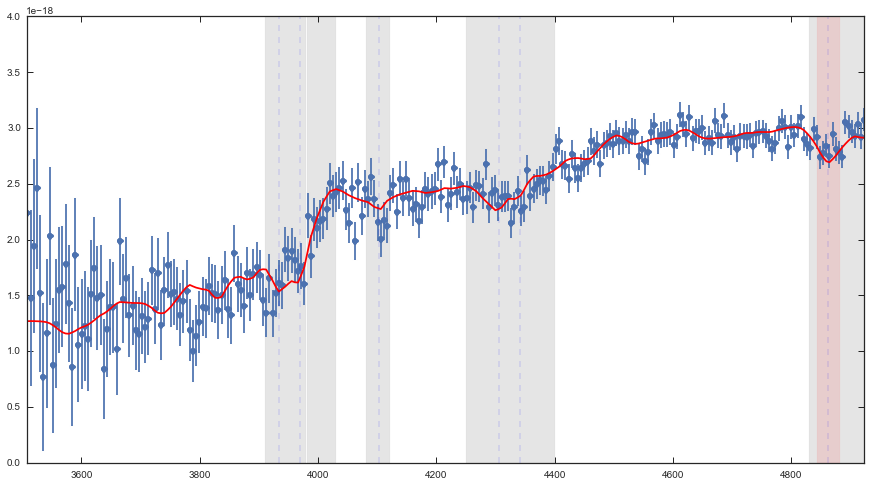

n37686
0.007

 4.5 0


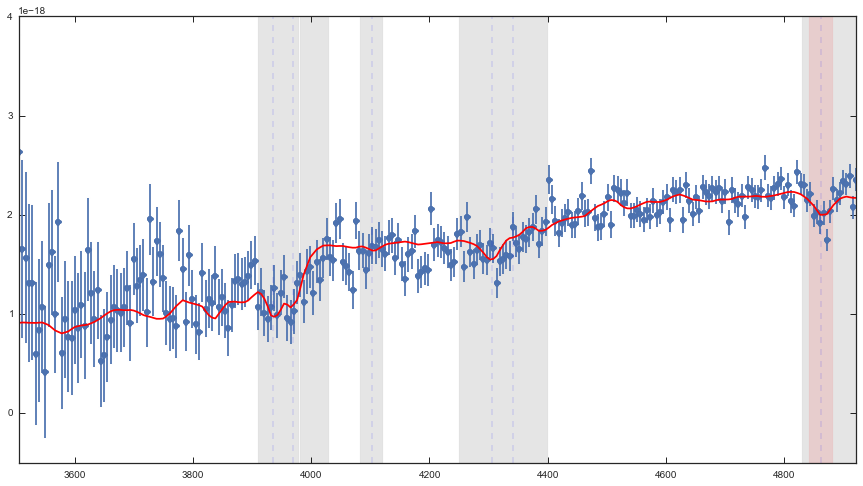

s39012
0.03

 5.3 9.18


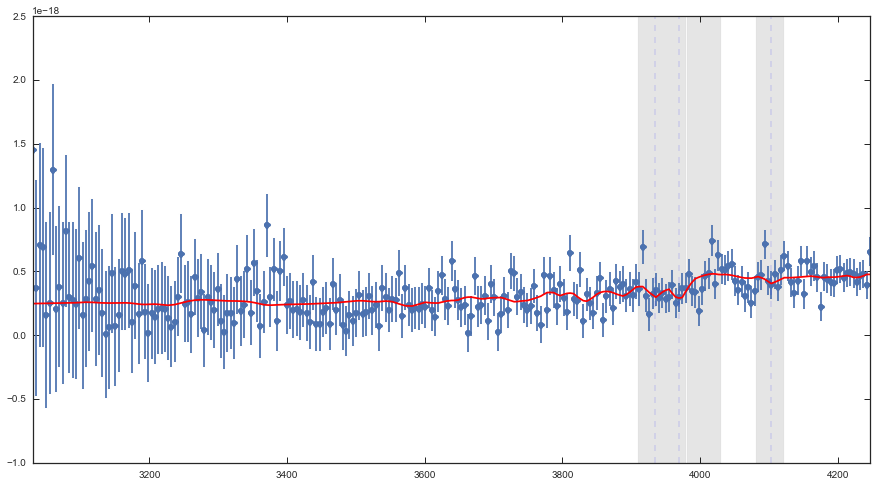

s39170
0.024

 5.8 9.0


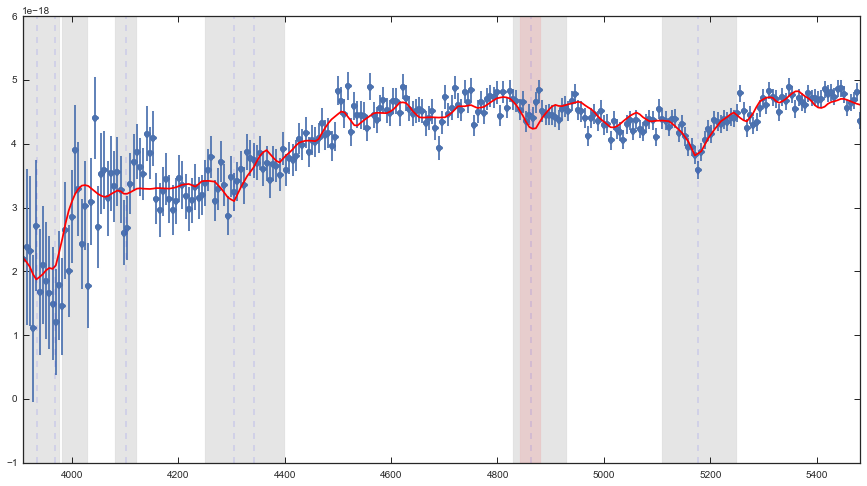

s39241
0.016

 5.6 0


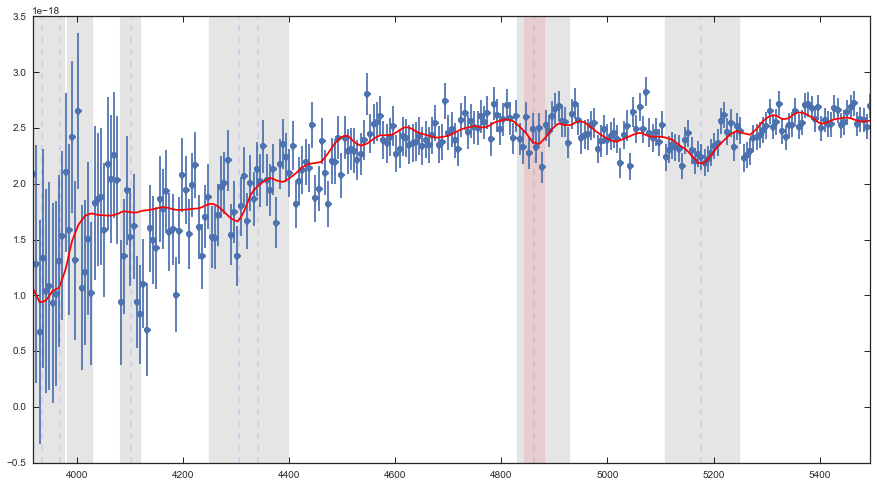

s39804
0.018

 6.0 9.0


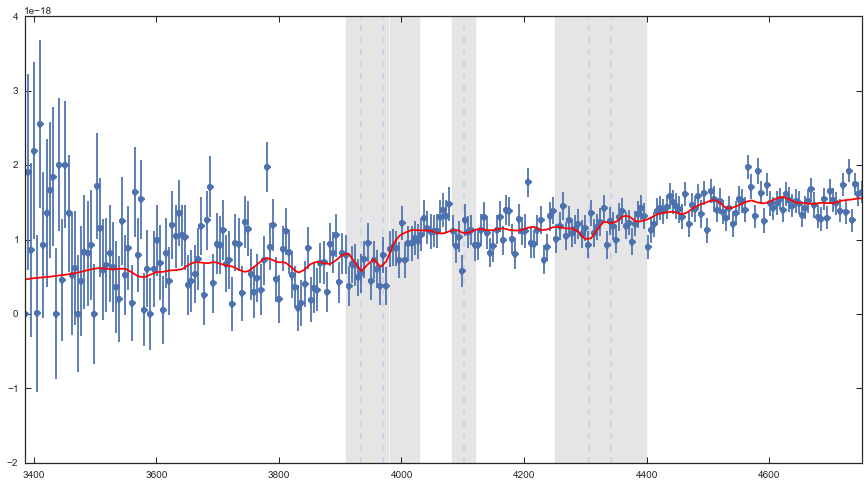

s40597
0.006

 2.9 0


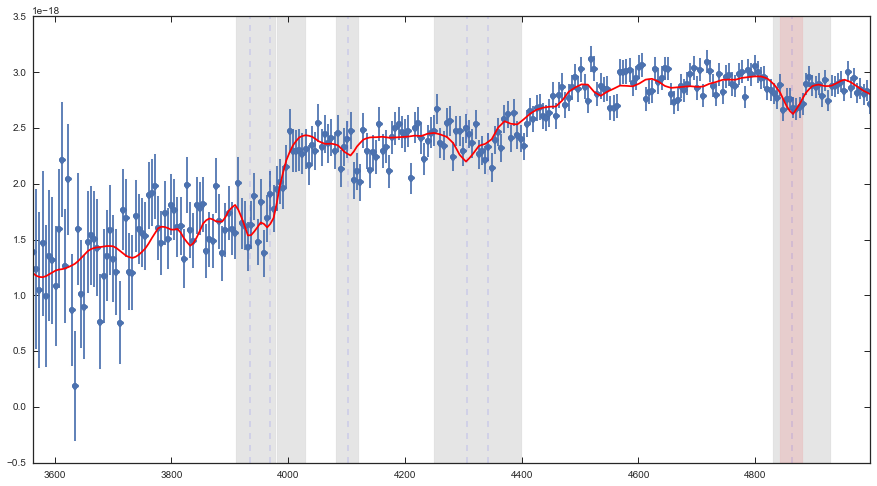

s41520
0.009

 1.4 0


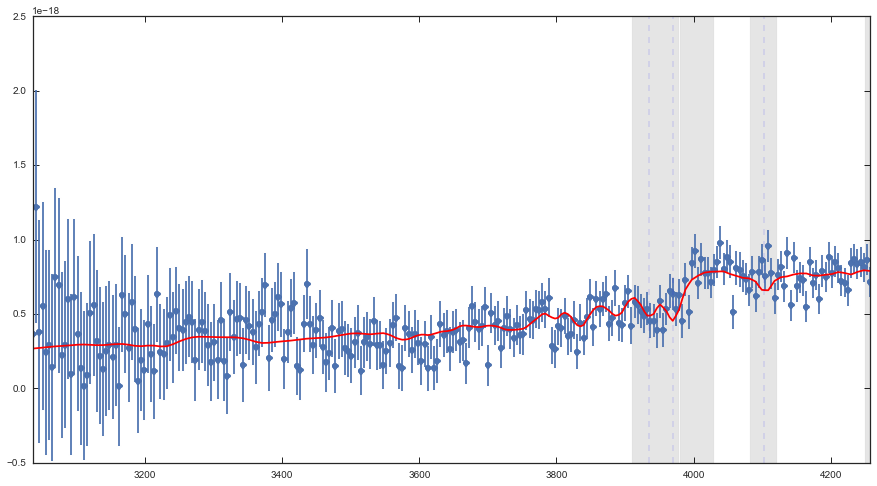

s46066
0.023

 6.0 0


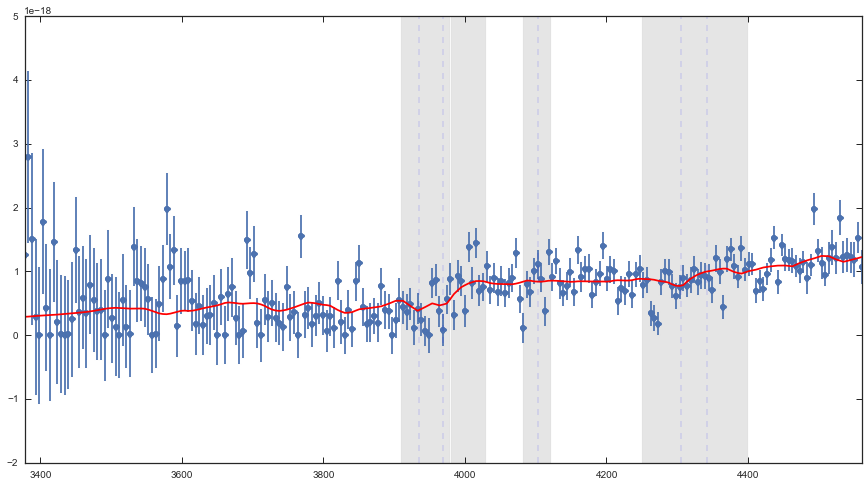

In [3]:
%matplotlib inline

for i in range(len(IDc)):
    print ids[IDc][i]
    bfm,bfa,bft = Best_fit_model('chidat/%s_mar29_galfit_chidata.fits' % ids[IDc][i],metal,age,tau)
    wv,fl,er=np.load(speclist[IDc][i])
    wv,fl,er=np.array([wv[wv<11100],fl[wv<11100],er[wv<11100]])
    if ids[IDc][i] == 's46066':
        wv,fl,er=np.array([wv[wv<10700],fl[wv<10700],er[wv<10700]])
    
    # if ids[IDc][i] == 'n21156' or ids[IDc][i] == 's39170' or ids[IDc][i] == 'n34694':
    #     IDer = []
    #     for ii in range(len(wv)):
    #         if 4855 * (1 + rshift[IDc][i]) <= wv[ii] <= 4880 * (1 + rshift[IDc][i]):
    #             IDer.append(ii)
    #     er[IDer] = 0
    #     fl[IDer] = 0
        
    mwv,mfl=np.load('../../../fsps_models_for_fit/galaxy_models/m%s_a%s_t%s_z%s_%s_model.npy' % (bfm,bfa,bft, rshift[IDc][i],ids[IDc][i]) )
    imfl=interp1d(mwv,mfl)(wv)
    C=Scale_model(fl,er,imfl)
    
    plt.figure(figsize=[15,8])
    plt.errorbar(wv/(1+rshift[IDc][i]),fl,er,fmt='o')
    plt.plot(wv/(1+rshift[IDc][i]),imfl*C,'r')
    plt.axvline(3934.777,linestyle='--', alpha=.1)
    plt.axvline(3969.588,linestyle='--', alpha=.1)
    plt.axvline(4102.89,linestyle='--', alpha=.1)
    plt.axvline(4305.61,linestyle='--', alpha=.1)
    plt.axvline(4341.68,linestyle='--', alpha=.1)
    plt.axvline(4862.68,linestyle='--', alpha=.1)
    plt.axvline(5176.7,linestyle='--', alpha=.1)
    plt.axvspan(3910, 3979, color='k', alpha=.1)
    plt.axvspan(3981, 4030, color='k', alpha=.1)
    plt.axvspan(4082, 4122, color='k', alpha=.1)
    plt.axvspan(4250, 4400, color='k', alpha=.1)
    plt.axvspan(4830, 4930, color='k', alpha=.1)
    plt.axvspan(4862.68 - 20, 4862.68 + 20, color='r', alpha=.1)
    plt.axvspan(5109, 5250, color='k', alpha=.1)
    plt.xlim(min(wv/(1+rshift[IDc][i])),max(wv/(1+rshift[IDc][i])))
    plt.show()
    plt.close()

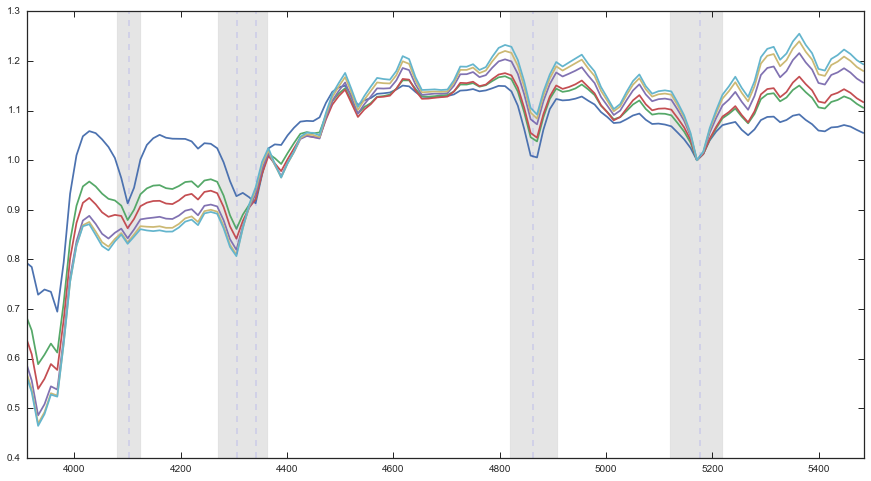

In [32]:
msamp=[.002,.007,.012,.019,.025,.03]
plt.figure(figsize=[15,8])

for i in range(len(msamp)):
    mwv,mfl=np.load('../../../fsps_models_for_fit/galaxy_models/m%s_a3.0_t8.3_z1.023_s39170_model.npy' % msamp[i] )
    mwv,mfl=np.array([mwv[mwv<11100],mfl[mwv<11100]])
    
    # print mwv[70]/(2.023)
    plt.plot(mwv/(2.023),mfl,label='%s' % msamp[i])
plt.axvline(4102.89,linestyle='--', alpha=.1)
plt.axvline(4305.61,linestyle='--', alpha=.1)
plt.axvline(4341.68,linestyle='--', alpha=.1)
plt.axvline(4862.68,linestyle='--', alpha=.1)
plt.axvline(5176.7,linestyle='--', alpha=.1)
plt.axvspan(4080, 4125, color='k', alpha=.1)
plt.axvspan(4270, 4365, color='k', alpha=.1)
plt.axvspan(4820, 4910, color='k', alpha=.1)
plt.axvspan(5120, 5220, color='k', alpha=.1)
plt.xlim(min(wv/(2.023)),max(wv/(2.023)))
plt.show()
plt.close()

14.3661237057


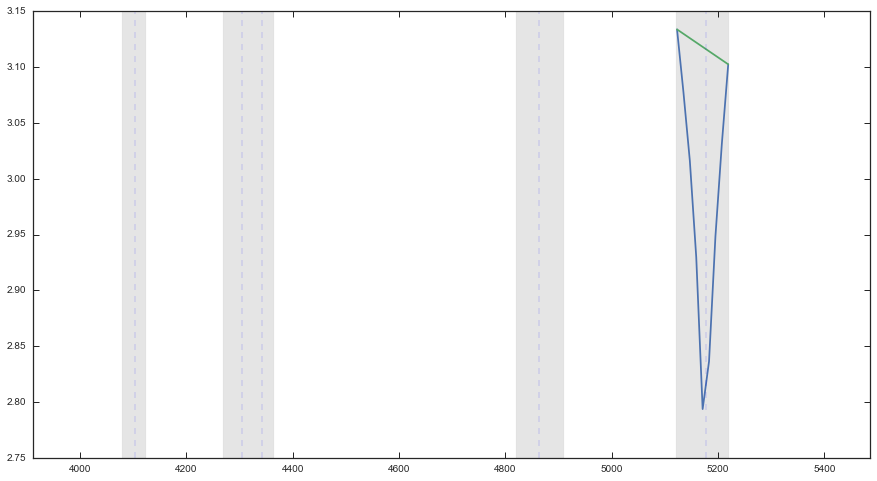

In [42]:
mwv,mfl=np.load('../../../fsps_models_for_fit/galaxy_models/m0.019_a3.0_t8.3_z1.023_s39170_model.npy')
mwv,mfl=np.array([mwv[mwv<11100],mfl[mwv<11100]])

IDx=[]
for i in range(len(mwv)):
    if 5120 <= mwv[i]/(2.023) <= 5220:
        IDx.append(i)  
contwv,contfl=np.array([[mwv[IDx][0],mwv[IDx][-1]],[mfl[IDx][0],mfl[IDx][-1]]])

mgew=(np.trapz(contfl,contwv)-np.trapz(mfl[IDx],mwv[IDx]))/2.023

print mgew

plt.figure(figsize=[15,8])
plt.plot(mwv[IDx]/(2.023),mfl[IDx])
plt.plot(contwv/(2.023),contfl)
plt.axvline(4102.89,linestyle='--', alpha=.1)
plt.axvline(4305.61,linestyle='--', alpha=.1)
plt.axvline(4341.68,linestyle='--', alpha=.1)
plt.axvline(4862.68,linestyle='--', alpha=.1)
plt.axvline(5176.7,linestyle='--', alpha=.1)
plt.axvspan(4080, 4125, color='k', alpha=.1)
plt.axvspan(4270, 4365, color='k', alpha=.1)
plt.axvspan(4820, 4910, color='k', alpha=.1)
plt.axvspan(5120, 5220, color='k', alpha=.1)
plt.xlim(min(wv/(2.023)),max(wv/(2.023)))
plt.show()
plt.close()

In [ ]:
def Equivalent_widths(mwv,mfl):
    ###h delta
    IDx=[]
    for i in range(len(mwv)):
        if 4080 <= mwv[i]/(2.023) <= 4125:
            IDx.append(i)  
    contwv,contfl=np.array([[mwv[IDx][0],mwv[IDx][-1]],[mfl[IDx][0],mfl[IDx][-1]]])
    
    hdew=(np.trapz(contfl,contwv)-np.trapz(mfl[IDx],mwv[IDx]))/2.023
    
    ###g band
    IDx=[]
    for i in range(len(mwv)):
        if 4270 <= mwv[i]/(2.023) <= 4365:
            IDx.append(i)  
    contwv,contfl=np.array([[mwv[IDx][0],mwv[IDx][-1]],[mfl[IDx][0],mfl[IDx][-1]]])
    
    gew=(np.trapz(contfl,contwv)-np.trapz(mfl[IDx],mwv[IDx]))/2.023
    
    ###h beta
    IDx=[]
    for i in range(len(mwv)):
        if 4820 <= mwv[i]/(2.023) <= 4910:
            IDx.append(i)  
    contwv,contfl=np.array([[mwv[IDx][0],mwv[IDx][-1]],[mfl[IDx][0],mfl[IDx][-1]]])
    
    hbew=(np.trapz(contfl,contwv)-np.trapz(mfl[IDx],mwv[IDx]))/2.023
    
    ###mg
    IDx=[]
    for i in range(len(mwv)):
        if 5120 <= mwv[i]/(2.023) <= 5220:
            IDx.append(i)  
    contwv,contfl=np.array([[mwv[IDx][0],mwv[IDx][-1]],[mfl[IDx][0],mfl[IDx][-1]]])
    
    mgew=(np.trapz(contfl,contwv)-np.trapz(mfl[IDx],mwv[IDx]))/2.023
    
    return hdew,gew,hbew,mgew

In [ ]:
msamp=[.002,.007,.012,.019,.025,.03]
hdeq,gew,hbew,mgew=np.zeros([4,len(msamp)])

for i in range(len(msamp)):
    mwv,mfl=np.load('../../../fsps_models_for_fit/galaxy_models/m%s_a3.0_t8.3_z1.023_s39170_model.npy' % msamp[i] )
    hdeq[i],gew[i],hbew[i],mgew[i]=Equivalent_widths(mwv,mfl)

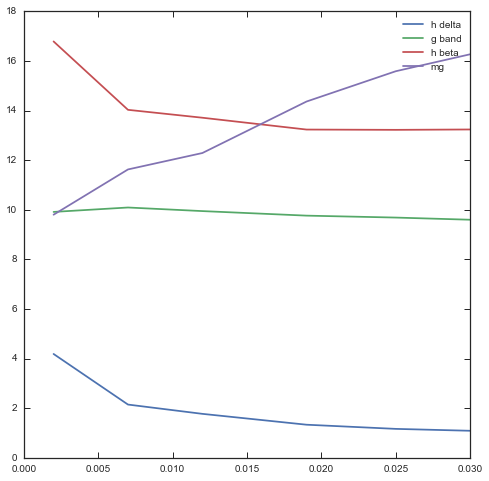

In [49]:
plt.figure(figsize=[8,8])
plt.plot(msamp,hdeq,label='h delta')
plt.plot(msamp,gew,label='g band')
plt.plot(msamp,hbew,label='h beta')
plt.plot(msamp,mgew,label='mg')
plt.legend()
plt.show()
plt.close()

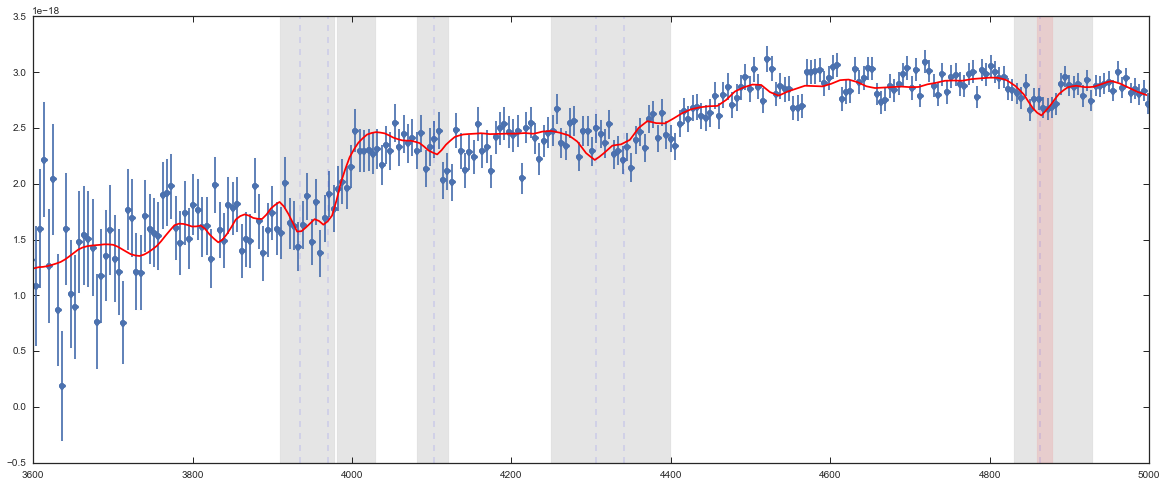

In [57]:
wv,fl,er=np.load('spec_stacks_jan24/s40597_stack.npy')
wv2,fl2,er2=np.load('spec_stacks_jan24/s39170_stack.npy')
wv,fl,er=np.array([wv[wv<11100],fl[wv<11100],er[wv<11100]])
wv2,fl2,er2=np.array([wv2[wv2<11100],fl2[wv2<11100],er2[wv2<11100]])

mwv,mfl=np.load('../../../fsps_models_for_fit/galaxy_models/m0.005_a3.4_t8.48_z1.221_s40597_model.npy')
imfl=interp1d(mwv,mfl)(wv)
C=Scale_model(fl,er,imfl)

# IDer = []
# for ii in range(len(wv)):
#     if 4855 * (1 + 1.229) <= wv[ii] <= 4880 * (1 + 1.229):
#         IDer.append(ii)
# er[IDer] = 1E8
# fl[IDer] = 0

plt.figure(figsize=[20,8])
plt.errorbar(wv/(1+1.22),fl,er,fmt='o')
# plt.errorbar(wv/(1+1.223),fl,er,fmt='o')
# plt.plot(wv2/(2.023),fl2/1.5)
# plt.plot(wv/(2.221),fl)
plt.plot(wv/(2.221),imfl*C,'r')
plt.axvline(3934.777,linestyle='--', alpha=.1)
plt.axvline(3969.588,linestyle='--', alpha=.1)
plt.axvline(4102.89,linestyle='--', alpha=.1)
plt.axvline(4305.61,linestyle='--', alpha=.1)
plt.axvline(4341.68,linestyle='--', alpha=.1)
plt.axvline(4862.68,linestyle='--', alpha=.1)
plt.axvline(5176.7,linestyle='--', alpha=.1)
plt.axvspan(3910, 3979, color='k', alpha=.1)
plt.axvspan(3981, 4030, color='k', alpha=.1)
plt.axvspan(4082, 4122, color='k', alpha=.1)
plt.axvspan(4250, 4400, color='k', alpha=.1)
plt.axvspan(4830, 4930, color='k', alpha=.1)
plt.axvspan(4860, 4880, color='r', alpha=.1)
plt.axvspan(5109, 5250, color='k', alpha=.1)
plt.xlim(3600,5000)
plt.show()
plt.close()

Best fit model is 4.4 Gyr and 0.004 Z


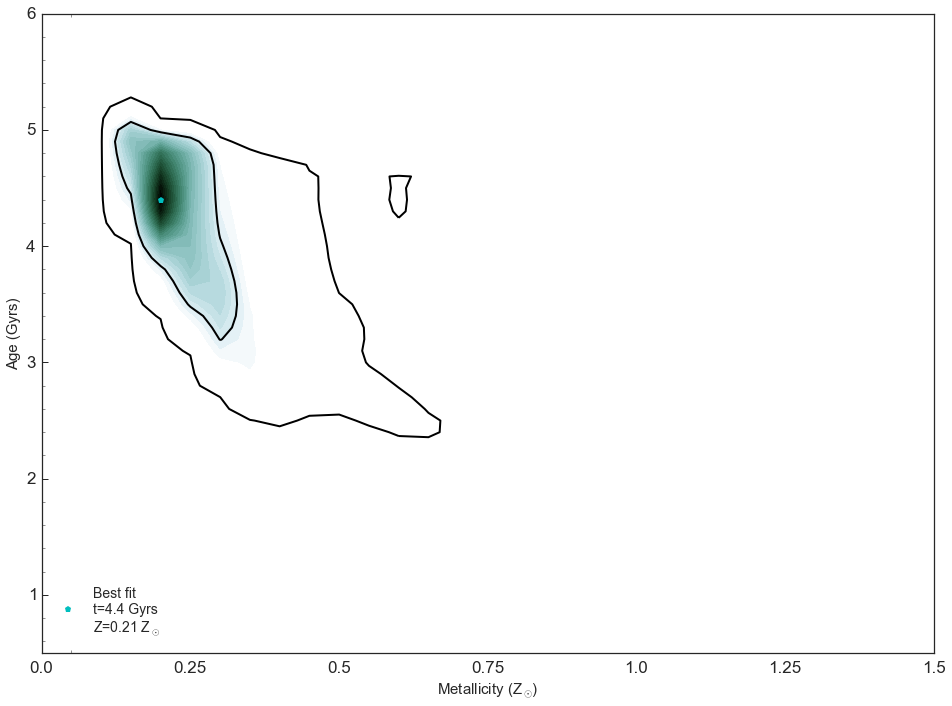

Best fit model is 4.2 Gyr and 0.004 Z


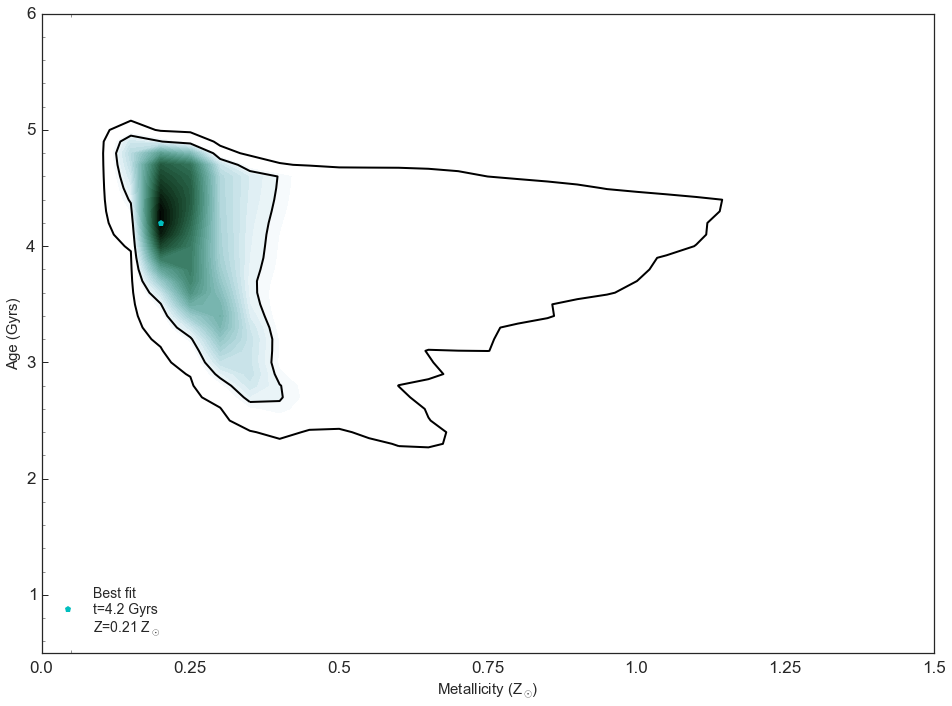

In [54]:
Pr, bfage, bfmetal= Analyze_Stack_avgage_cont_feat('chidat/s40597_mar29_galfit_cont_chidata.fits','chidat/s40597_mar29_galfit_feat_chidata.fits',np.array(tau),metal,age)    
# Pr, bfage, bfmetal= Analyze_Stack_avgage('chidat/s40597_mar29_galfit_chidata.fits',np.array(tau),metal,age)    

onesig,twosig=Likelihood_contours(age,metal,Pr)
levels=np.array([twosig,onesig])
plt.figure(figsize=[16,12])
plt.contour(M,A,Pr,levels,colors='k',linewidths=2)
plt.contourf(M,A,Pr,40,cmap=colmap)
plt.plot(bfmetal,bfage,'cp',label='\nBest fit\nt=%s Gyrs\nZ=%s Z$_\odot$' % (bfage,np.round(bfmetal/0.019,2)))
plt.xticks([0,.005,.01,.015,.02,.025,.03],np.round(np.array([0,.005,.01,.015,.02,.025,.03])/0.02,2))
plt.tick_params(axis='both', which='major', labelsize=17)
plt.gcf().subplots_adjust(bottom=0.16)
plt.minorticks_on()
plt.xlabel('Metallicity (Z$_\odot$)',fontsize=15)
plt.ylabel('Age (Gyrs)',fontsize=15)
plt.legend(loc=3,fontsize=14)
plt.show()
plt.close()

Pr, bfage, bfmetal= Analyze_Stack_avgage_cont_feat('chidat/s40597_mar31_galfit_cont_chidata.fits','chidat/s40597_mar31_galfit_feat_chidata.fits',np.array(tau),metal,age)    
# Pr, bfage, bfmetal= Analyze_Stack_avgage('chidat/s40597_mar31_galfit_chidata.fits',np.array(tau),metal,age)    

onesig,twosig=Likelihood_contours(age,metal,Pr)
levels=np.array([twosig,onesig])
plt.figure(figsize=[16,12])
plt.contour(M,A,Pr,levels,colors='k',linewidths=2)
plt.contourf(M,A,Pr,40,cmap=colmap)
plt.plot(bfmetal,bfage,'cp',label='\nBest fit\nt=%s Gyrs\nZ=%s Z$_\odot$' % (bfage,np.round(bfmetal/0.019,2)))
plt.xticks([0,.005,.01,.015,.02,.025,.03],np.round(np.array([0,.005,.01,.015,.02,.025,.03])/0.02,2))
plt.tick_params(axis='both', which='major', labelsize=17)
plt.gcf().subplots_adjust(bottom=0.16)
plt.minorticks_on()
plt.xlabel('Metallicity (Z$_\odot$)',fontsize=15)
plt.ylabel('Age (Gyrs)',fontsize=15)
plt.legend(loc=3,fontsize=14)
plt.show()
plt.close()

In [18]:
Single_gal_fit_full('spec_stacks_jan24/s39170_ns_stack.npy',tau,metal,age,1.023,'s39170','s39170_ns_apr5_galfit')

Done!


Best fit model is 4.9 Gyr and 0.026 Z


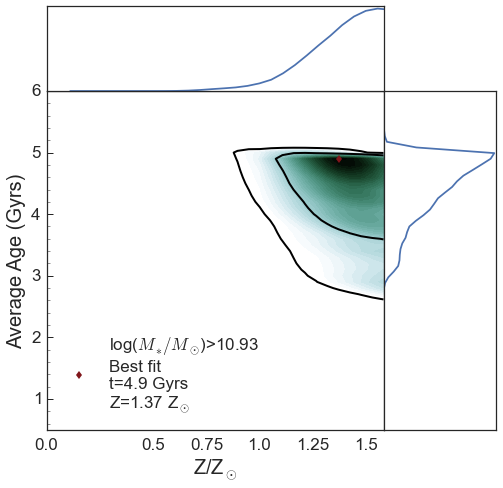

Best fit model is 4.9 Gyr and 0.025 Z


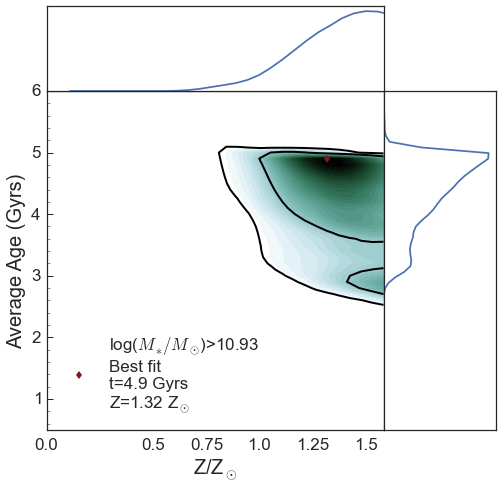

In [20]:
Pr, bfage, bfmetal= Analyze_Stack_avgage_cont_feat('chidat/s39170_ns_apr5_galfit_cont_chidata.fits','chidat/s39170_ns_apr5_galfit_feat_chidata.fits'
                                                   ,np.array(tau),metal,age)    
a=[np.trapz(U,metal) for U in Pr]
m=np.array([np.trapz(U,age) for U in Pr.T])/0.019
gs=gridspec.GridSpec(2,2,width_ratios=[3,1],height_ratios=[1,4])

onesig,twosig=Likelihood_contours(age,metal,Pr)
levels=np.array([twosig,onesig])

plt.figure(figsize=[8,8])
gs.update(wspace=0.0,hspace=0.0)
ax=plt.subplot(gs[1,0])
plt.contour(M,A,Pr,levels,colors='k',linewidths=2)
plt.contourf(M,A,Pr,40,cmap=colmap)
plt.xlabel('Z/Z$_\odot$',size=20)
plt.ylabel('Average Age (Gyrs)',size=20)
plt.plot(bfmetal,bfage,'d',color='#81161B',ms=6,
            label='log($M_*/M_\odot$)>10.93\nBest fit\nt=%s Gyrs\nZ=%s Z$_\odot$' %
                  (bfage,np.round(bfmetal/0.019,2)))
plt.legend(loc=3,fontsize=17)
plt.xticks([0,0.0095, 0.01425, 0.019, 0.02375, 0.0285],
           np.round(np.array([0,0.0095, 0.01425, 0.019, 0.02375, 0.0285])/0.019, 2))

plt.minorticks_on()
plt.tick_params(axis='both', which='major', labelsize=17)

plt.subplot(gs[1,1])
plt.plot(a,age)
plt.ylim(0,6)
plt.yticks([])
plt.xticks([])
#
plt.subplot(gs[0,0])
plt.plot(metal/0.019,m)
plt.xlim(0,1.5)
plt.yticks([])
plt.xticks([])
plt.gcf().subplots_adjust(bottom=0.165,left=0.12)
plt.show()
plt.close()

Pr, bfage, bfmetal= Analyze_Stack_avgage_cont_feat('chidat/s39170_mar29_galfit_cont_chidata.fits','chidat/s39170_mar29_galfit_feat_chidata.fits'
                                                   ,np.array(tau),metal,age)    
a=[np.trapz(U,metal) for U in Pr]
m=np.array([np.trapz(U,age) for U in Pr.T])/0.019
gs=gridspec.GridSpec(2,2,width_ratios=[3,1],height_ratios=[1,4])

onesig,twosig=Likelihood_contours(age,metal,Pr)
levels=np.array([twosig,onesig])

plt.figure(figsize=[8,8])
gs.update(wspace=0.0,hspace=0.0)
ax=plt.subplot(gs[1,0])
plt.contour(M,A,Pr,levels,colors='k',linewidths=2)
plt.contourf(M,A,Pr,40,cmap=colmap)
plt.xlabel('Z/Z$_\odot$',size=20)
plt.ylabel('Average Age (Gyrs)',size=20)
plt.plot(bfmetal,bfage,'d',color='#81161B',ms=6,
            label='log($M_*/M_\odot$)>10.93\nBest fit\nt=%s Gyrs\nZ=%s Z$_\odot$' %
                  (bfage,np.round(bfmetal/0.019,2)))
plt.legend(loc=3,fontsize=17)
plt.xticks([0,0.0095, 0.01425, 0.019, 0.02375, 0.0285],
           np.round(np.array([0,0.0095, 0.01425, 0.019, 0.02375, 0.0285])/0.019, 2))

plt.minorticks_on()
plt.tick_params(axis='both', which='major', labelsize=17)

plt.subplot(gs[1,1])
plt.plot(a,age)
plt.ylim(0,6)
plt.yticks([])
plt.xticks([])
#
plt.subplot(gs[0,0])
plt.plot(metal/0.019,m)
plt.xlim(0,1.5)
plt.yticks([])
plt.xticks([])
plt.gcf().subplots_adjust(bottom=0.165,left=0.12)
plt.show()
plt.close()

Best fit model is 4.8 Gyr and 0.03 Z


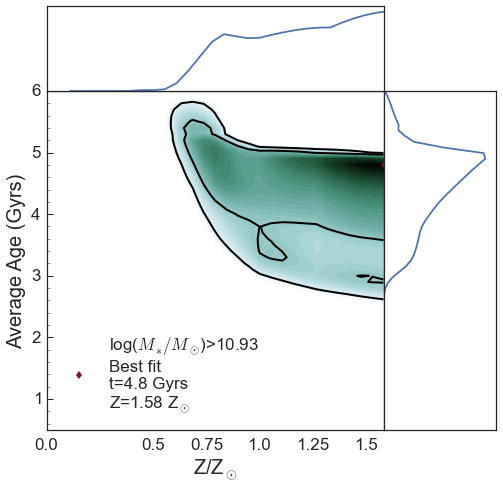

Best fit model is 2.9 Gyr and 0.03 Z


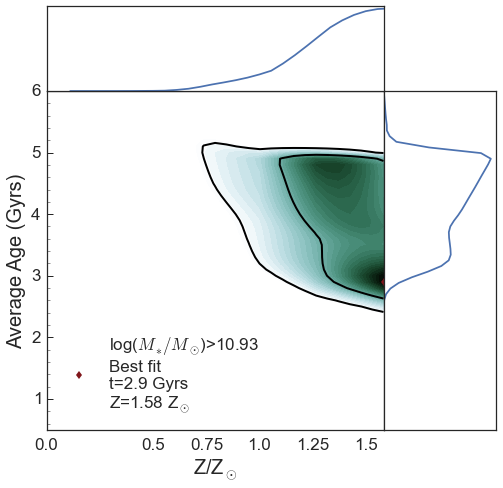

In [25]:
Pr, bfage, bfmetal= Analyze_Stack_avgage('chidat/s39170_ns_apr5_galfit_cont_chidata.fits',np.array(tau),metal,age)    
a=[np.trapz(U,metal) for U in Pr]
m=np.array([np.trapz(U,age) for U in Pr.T])/0.019
gs=gridspec.GridSpec(2,2,width_ratios=[3,1],height_ratios=[1,4])

onesig,twosig=Likelihood_contours(age,metal,Pr)
levels=np.array([twosig,onesig])

plt.figure(figsize=[8,8])
gs.update(wspace=0.0,hspace=0.0)
ax=plt.subplot(gs[1,0])
plt.contour(M,A,Pr,levels,colors='k',linewidths=2)
plt.contourf(M,A,Pr,40,cmap=colmap)
plt.xlabel('Z/Z$_\odot$',size=20)
plt.ylabel('Average Age (Gyrs)',size=20)
plt.plot(bfmetal,bfage,'d',color='#81161B',ms=6,
            label='log($M_*/M_\odot$)>10.93\nBest fit\nt=%s Gyrs\nZ=%s Z$_\odot$' %
                  (bfage,np.round(bfmetal/0.019,2)))
plt.legend(loc=3,fontsize=17)
plt.xticks([0,0.0095, 0.01425, 0.019, 0.02375, 0.0285],
           np.round(np.array([0,0.0095, 0.01425, 0.019, 0.02375, 0.0285])/0.019, 2))

plt.minorticks_on()
plt.tick_params(axis='both', which='major', labelsize=17)

plt.subplot(gs[1,1])
plt.plot(a,age)
plt.ylim(0,6)
plt.yticks([])
plt.xticks([])
#
plt.subplot(gs[0,0])
plt.plot(metal/0.019,m)
plt.xlim(0,1.5)
plt.yticks([])
plt.xticks([])
plt.gcf().subplots_adjust(bottom=0.165,left=0.12)
plt.show()
plt.close()

Pr, bfage, bfmetal= Analyze_Stack_avgage('chidat/s39170_ns_apr5_galfit_feat_chidata.fits',np.array(tau),metal,age)    
a=[np.trapz(U,metal) for U in Pr]
m=np.array([np.trapz(U,age) for U in Pr.T])/0.019
gs=gridspec.GridSpec(2,2,width_ratios=[3,1],height_ratios=[1,4])

onesig,twosig=Likelihood_contours(age,metal,Pr)
levels=np.array([twosig,onesig])

plt.figure(figsize=[8,8])
gs.update(wspace=0.0,hspace=0.0)
ax=plt.subplot(gs[1,0])
plt.contour(M,A,Pr,levels,colors='k',linewidths=2)
plt.contourf(M,A,Pr,40,cmap=colmap)
plt.xlabel('Z/Z$_\odot$',size=20)
plt.ylabel('Average Age (Gyrs)',size=20)
plt.plot(bfmetal,bfage,'d',color='#81161B',ms=6,
            label='log($M_*/M_\odot$)>10.93\nBest fit\nt=%s Gyrs\nZ=%s Z$_\odot$' %
                  (bfage,np.round(bfmetal/0.019,2)))
plt.legend(loc=3,fontsize=17)
plt.xticks([0,0.0095, 0.01425, 0.019, 0.02375, 0.0285],
           np.round(np.array([0,0.0095, 0.01425, 0.019, 0.02375, 0.0285])/0.019, 2))

plt.minorticks_on()
plt.tick_params(axis='both', which='major', labelsize=17)

plt.subplot(gs[1,1])
plt.plot(a,age)
plt.ylim(0,6)
plt.yticks([])
plt.xticks([])
#
plt.subplot(gs[0,0])
plt.plot(metal/0.019,m)
plt.xlim(0,1.5)
plt.yticks([])
plt.xticks([])
plt.gcf().subplots_adjust(bottom=0.165,left=0.12)
plt.show()
plt.close()

In [6]:
%matplotlib inline
Pr, bfage, bfmetal= Analyze_Stack_avgage_cont_feat('chidat/s40597_O1_apr4_galfit_cont_chidata.fits','chidat/s40597_O1_apr4_galfit_feat_chidata.fits'
                                                   ,np.array(tau),metal,age)    
Plot_LH(Pr,bfmetal,bfage,save_plot=True,plot_name='../important_plots/s40597_O1_lh_apr6.png')

Pr, bfage, bfmetal= Analyze_Stack_avgage_cont_feat('chidat/s40597_O2_apr4_galfit_cont_chidata.fits','chidat/s40597_O2_apr4_galfit_feat_chidata.fits'
                                                   ,np.array(tau),metal,age)    
Plot_LH(Pr,bfmetal,bfage,save_plot=True,plot_name='../important_plots/s40597_O2_lh_apr6.png')

Pr, bfage, bfmetal= Analyze_Stack_avgage_cont_feat('chidat/s40597_O3_apr4_galfit_cont_chidata.fits','chidat/s40597_O3_apr4_galfit_feat_chidata.fits'
                                                   ,np.array(tau),metal,age)    
Plot_LH(Pr,bfmetal,bfage,save_plot=True,plot_name='../important_plots/s40597_O3_lh_apr6.png')

olist=['O1','O2','O3']
c_cont_list=['chidat/s40597_%s_apr4_galfit_cont_chidata.fits' % U for U in olist]
c_feat_list=['chidat/s40597_%s_apr4_galfit_feat_chidata.fits' % U for U in olist]

Pr, bfage, bfmetal= Analyze_Stack_avgage_cont_feat_combine(c_cont_list,c_feat_list,np.array(tau),metal,age)      
Plot_LH(Pr,bfmetal,bfage,save_plot=True,plot_name='../important_plots/s40597_comall_lh_apr6.png')

Pr, bfage, bfmetal= Analyze_Stack_avgage_cont_feat('chidat/s40597_mar29_galfit_cont_chidata.fits','chidat/s40597_mar29_galfit_feat_chidata.fits'
                                                   ,np.array(tau),metal,age)    
Plot_LH(Pr,bfmetal,bfage,save_plot=True,plot_name='../important_plots/s40597_lh_apr6.png')

Best fit model is 4.4 Gyr and 0.005 Z
Best fit model is 2.5 Gyr and 0.009 Z


Best fit model is 4.7 Gyr and 0.003 Z


Best fit model is 4.4 Gyr and 0.003 Z


Best fit model is 3.4 Gyr and 0.005 Z

Best fit model is 4.4 Gyr and 0.003 Z


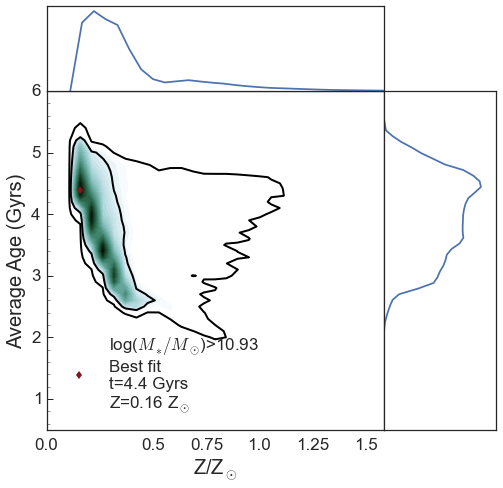

Best fit model is 3.4 Gyr and 0.005 Z


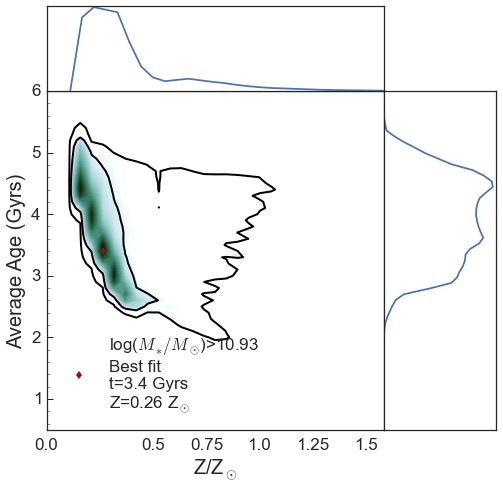

In [16]:
%matplotlib inline

olist=['O1','O2','O3']
c_cont_list=['chidat/s40597_%s_apr4_galfit_cont_chidata.fits' % U for U in olist]
c_feat_list=['chidat/s40597_%s_apr4_galfit_feat_chidata.fits' % U for U in olist]

Pr, bfage, bfmetal= Analyze_Stack_avgage_cont_feat_combine(c_cont_list,c_feat_list,np.array(tau),metal,age)    
a=[np.trapz(U,metal) for U in Pr]
m=np.array([np.trapz(U,age) for U in Pr.T])/0.019
gs=gridspec.GridSpec(2,2,width_ratios=[3,1],height_ratios=[1,4])

onesig,twosig=Likelihood_contours(age,metal,Pr)
levels=np.array([twosig,onesig])

plt.figure(figsize=[8,8])
gs.update(wspace=0.0,hspace=0.0)
ax=plt.subplot(gs[1,0])
plt.contour(M,A,Pr,levels,colors='k',linewidths=2)
plt.contourf(M,A,Pr,40,cmap=colmap)
plt.xlabel('Z/Z$_\odot$',size=20)
plt.ylabel('Average Age (Gyrs)',size=20)
plt.plot(bfmetal,bfage,'d',color='#81161B',ms=6,
            label='log($M_*/M_\odot$)>10.93\nBest fit\nt=%s Gyrs\nZ=%s Z$_\odot$' %
                  (bfage,np.round(bfmetal/0.019,2)))
plt.legend(loc=3,fontsize=17)
plt.xticks([0,0.0095, 0.01425, 0.019, 0.02375, 0.0285],
           np.round(np.array([0,0.0095, 0.01425, 0.019, 0.02375, 0.0285])/0.019, 2))

plt.minorticks_on()
plt.tick_params(axis='both', which='major', labelsize=17)

plt.subplot(gs[1,1])
plt.plot(a,age)
plt.ylim(0,6)
plt.yticks([])
plt.xticks([])
#
plt.subplot(gs[0,0])
plt.plot(metal/0.019,m)
plt.xlim(0,1.5)
plt.yticks([])
plt.xticks([])
plt.gcf().subplots_adjust(bottom=0.165,left=0.12)
plt.show()
plt.close()


Pr, bfage, bfmetal= Analyze_Stack_avgage_cont_feat('chidat/s40597_mar29_galfit_cont_chidata.fits','chidat/s40597_mar29_galfit_feat_chidata.fits'
                                                   ,np.array(tau),metal,age)    
a=[np.trapz(U,metal) for U in Pr]
m=np.array([np.trapz(U,age) for U in Pr.T])/0.019
gs=gridspec.GridSpec(2,2,width_ratios=[3,1],height_ratios=[1,4])

onesig,twosig=Likelihood_contours(age,metal,Pr)
levels=np.array([twosig,onesig])

plt.figure(figsize=[8,8])
gs.update(wspace=0.0,hspace=0.0)
ax=plt.subplot(gs[1,0])
plt.contour(M,A,Pr,levels,colors='k',linewidths=2)
plt.contourf(M,A,Pr,40,cmap=colmap)
plt.xlabel('Z/Z$_\odot$',size=20)
plt.ylabel('Average Age (Gyrs)',size=20)
plt.plot(bfmetal,bfage,'d',color='#81161B',ms=6,
            label='log($M_*/M_\odot$)>10.93\nBest fit\nt=%s Gyrs\nZ=%s Z$_\odot$' %
                  (bfage,np.round(bfmetal/0.019,2)))
plt.legend(loc=3,fontsize=17)
plt.xticks([0,0.0095, 0.01425, 0.019, 0.02375, 0.0285],
           np.round(np.array([0,0.0095, 0.01425, 0.019, 0.02375, 0.0285])/0.019, 2))

plt.minorticks_on()
plt.tick_params(axis='both', which='major', labelsize=17)

plt.subplot(gs[1,1])
plt.plot(a,age)
plt.ylim(0,6)
plt.yticks([])
plt.xticks([])
#
plt.subplot(gs[0,0])
plt.plot(metal/0.019,m)
plt.xlim(0,1.5)
plt.yticks([])
plt.xticks([])
plt.gcf().subplots_adjust(bottom=0.165,left=0.12)
plt.show()
plt.close()

Best fit model is 4.6 Gyr and 0.004 Z


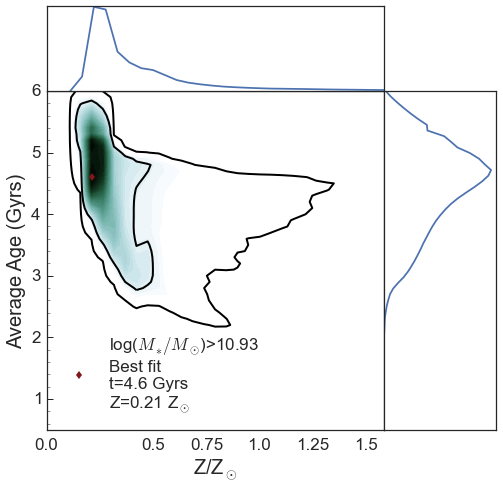

Best fit model is 4.0 Gyr and 0.003 Z


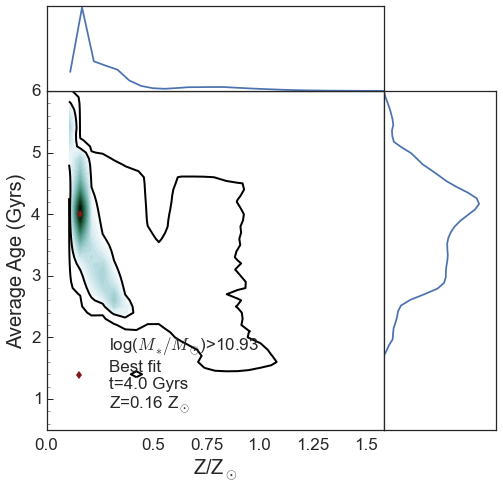

In [4]:
%matplotlib inline

Pr, bfage, bfmetal= Analyze_Stack_avgage('chidat/s40597_mar29_galfit_cont_chidata.fits',np.array(tau),metal,age)    
a=[np.trapz(U,metal) for U in Pr]
m=np.array([np.trapz(U,age) for U in Pr.T])/0.019
gs=gridspec.GridSpec(2,2,width_ratios=[3,1],height_ratios=[1,4])

onesig,twosig=Likelihood_contours(age,metal,Pr)
levels=np.array([twosig,onesig])

plt.figure(figsize=[8,8])
gs.update(wspace=0.0,hspace=0.0)
ax=plt.subplot(gs[1,0])
plt.contour(M,A,Pr,levels,colors='k',linewidths=2)
plt.contourf(M,A,Pr,40,cmap=colmap)
plt.xlabel('Z/Z$_\odot$',size=20)
plt.ylabel('Average Age (Gyrs)',size=20)
plt.plot(bfmetal,bfage,'d',color='#81161B',ms=6,
            label='log($M_*/M_\odot$)>10.93\nBest fit\nt=%s Gyrs\nZ=%s Z$_\odot$' %
                  (bfage,np.round(bfmetal/0.019,2)))
plt.legend(loc=3,fontsize=17)
plt.xticks([0,0.0095, 0.01425, 0.019, 0.02375, 0.0285],
           np.round(np.array([0,0.0095, 0.01425, 0.019, 0.02375, 0.0285])/0.019, 2))

plt.minorticks_on()
plt.tick_params(axis='both', which='major', labelsize=17)

plt.subplot(gs[1,1])
plt.plot(a,age)
plt.ylim(0,6)
plt.yticks([])
plt.xticks([])
#
plt.subplot(gs[0,0])
plt.plot(metal/0.019,m)
plt.xlim(0,1.5)
plt.yticks([])
plt.xticks([])
plt.gcf().subplots_adjust(bottom=0.165,left=0.12)
plt.show()
plt.close()

Pr, bfage, bfmetal= Analyze_Stack_avgage('chidat/s40597_mar29_galfit_feat_chidata.fits',np.array(tau),metal,age)    
a=[np.trapz(U,metal) for U in Pr]
m=np.array([np.trapz(U,age) for U in Pr.T])/0.019
gs=gridspec.GridSpec(2,2,width_ratios=[3,1],height_ratios=[1,4])

onesig,twosig=Likelihood_contours(age,metal,Pr)
levels=np.array([twosig,onesig])

plt.figure(figsize=[8,8])
gs.update(wspace=0.0,hspace=0.0)
ax=plt.subplot(gs[1,0])
plt.contour(M,A,Pr,levels,colors='k',linewidths=2)
plt.contourf(M,A,Pr,40,cmap=colmap)
plt.xlabel('Z/Z$_\odot$',size=20)
plt.ylabel('Average Age (Gyrs)',size=20)
plt.plot(bfmetal,bfage,'d',color='#81161B',ms=6,
            label='log($M_*/M_\odot$)>10.93\nBest fit\nt=%s Gyrs\nZ=%s Z$_\odot$' %
                  (bfage,np.round(bfmetal/0.019,2)))
plt.legend(loc=3,fontsize=17)
plt.xticks([0,0.0095, 0.01425, 0.019, 0.02375, 0.0285],
           np.round(np.array([0,0.0095, 0.01425, 0.019, 0.02375, 0.0285])/0.019, 2))

plt.minorticks_on()
plt.tick_params(axis='both', which='major', labelsize=17)

plt.subplot(gs[1,1])
plt.plot(a,age)
plt.ylim(0,6)
plt.yticks([])
plt.xticks([])
#
plt.subplot(gs[0,0])
plt.plot(metal/0.019,m)
plt.xlim(0,1.5)
plt.yticks([])
plt.xticks([])
plt.gcf().subplots_adjust(bottom=0.165,left=0.12)
plt.show()
plt.close()

In [ ]:
def Analyze_Stack_avgage_cont_feat2(contfits, featfits, tau, metal, age, age_conv='tau_scale_ntau.dat'):
    ####### Read in file
    Cdat = fits.open(contfits)
    Cchi = np.zeros([len(metal), len(age), len(tau)])

    Fdat = fits.open(featfits)
    Fchi = np.zeros([len(metal), len(age), len(tau)])

    for i in range(len(metal)):
        Fchi[i] = Fdat[i + 1].data
        Cchi[i] = Cdat[i + 1].data

    Fchi = Fchi.T
    Cchi = Cchi.T

    scale = Readfile(age_conv)

    overhead = np.zeros(len(scale))
    for i in range(len(scale)):
        amt = []
        for ii in range(len(age)):
            if age[ii] > scale[i][-1]:
                amt.append(1)
        overhead[i] = sum(amt)

    newCchi = np.zeros(Cchi.shape)
    newFchi = np.zeros(Fchi.shape)

    for i in range(len(Cchi)):
        if i == 0:
            newCchi[i] = Cchi[i]
            newFchi[i] = Fchi[i]
        else:
            cframe = interp2d(metal, scale[i], Cchi[i])(metal, age[:-overhead[i]])
            newCchi[i] = np.append(cframe, np.repeat([np.repeat(1E5, len(metal))], overhead[i], axis=0), axis=0)

            fframe = interp2d(metal, scale[i], Fchi[i])(metal, age[:-overhead[i]])
            newFchi[i] = np.append(fframe, np.repeat([np.repeat(1E5, len(metal))], overhead[i], axis=0), axis=0)

    ####### Create normalize probablity marginalized over tau

    ultau = np.append(0, np.power(10, tau[1:] - 9))

    cprob = np.exp(-newCchi.T.astype(np.float128) / 2)

    Pc = np.trapz(cprob, ultau, axis=2)
    Cc = np.trapz(np.trapz(Pc, age, axis=1), metal)

    fprob = np.exp(-newFchi.T.astype(np.float128) / 2)

    Pf = np.trapz(fprob, ultau, axis=2)
    Cf = np.trapz(np.trapz(Pf, age, axis=1), metal)

    comb_prob = cprob / Cc * ((fprob / Cf)**2)

    prob = np.trapz(comb_prob, ultau, axis=2)
    C0 = np.trapz(np.trapz(prob, age, axis=1), metal)
    prob /= C0

    ##### get best fit values
    [idmax] = np.argwhere(prob == np.max(prob))
    print 'Best fit model is %s Gyr and %s Z' % (age[idmax[1]], metal[idmax[0]])

    return prob.T, age[idmax[1]], metal[idmax[0]]

Best fit model is 3.4 Gyr and 0.005 Z


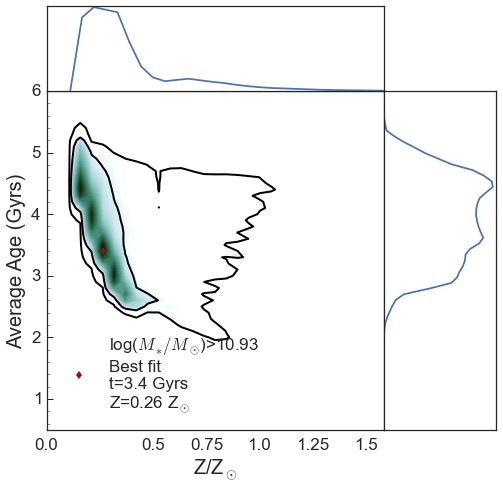

Best fit model is 4.9 Gyr and 0.025 Z


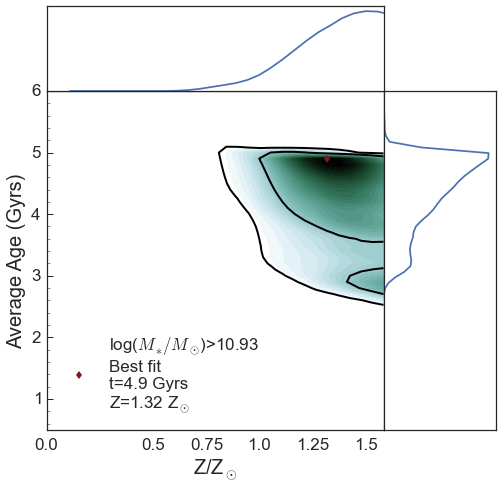

In [16]:
Pr, bfage, bfmetal= Analyze_Stack_avgage_cont_feat('chidat/s40597_mar29_galfit_cont_chidata.fits','chidat/s40597_mar29_galfit_feat_chidata.fits'
                                                   ,np.array(tau),metal,age)    
a=[np.trapz(U,metal) for U in Pr]
m=np.array([np.trapz(U,age) for U in Pr.T])/0.019
gs=gridspec.GridSpec(2,2,width_ratios=[3,1],height_ratios=[1,4])

onesig,twosig=Likelihood_contours(age,metal,Pr)
levels=np.array([twosig,onesig])

plt.figure(figsize=[8,8])
gs.update(wspace=0.0,hspace=0.0)
ax=plt.subplot(gs[1,0])
plt.contour(M,A,Pr,levels,colors='k',linewidths=2)
plt.contourf(M,A,Pr,40,cmap=colmap)
plt.xlabel('Z/Z$_\odot$',size=20)
plt.ylabel('Average Age (Gyrs)',size=20)
plt.plot(bfmetal,bfage,'d',color='#81161B',ms=6,
            label='log($M_*/M_\odot$)>10.93\nBest fit\nt=%s Gyrs\nZ=%s Z$_\odot$' %
                  (bfage,np.round(bfmetal/0.019,2)))
plt.legend(loc=3,fontsize=17)
plt.xticks([0,0.0095, 0.01425, 0.019, 0.02375, 0.0285],
           np.round(np.array([0,0.0095, 0.01425, 0.019, 0.02375, 0.0285])/0.019, 2))

plt.minorticks_on()
plt.tick_params(axis='both', which='major', labelsize=17)

plt.subplot(gs[1,1])
plt.plot(a,age)
plt.ylim(0,6)
plt.yticks([])
plt.xticks([])
#
plt.subplot(gs[0,0])
plt.plot(metal/0.019,m)
plt.xlim(0,1.5)
plt.yticks([])
plt.xticks([])
plt.gcf().subplots_adjust(bottom=0.165,left=0.12)
plt.show()
plt.close()

Pr, bfage, bfmetal= Analyze_Stack_avgage_cont_feat('chidat/s39170_mar29_galfit_cont_chidata.fits','chidat/s39170_mar29_galfit_feat_chidata.fits'
                                                   ,np.array(tau),metal,age)    
a=[np.trapz(U,metal) for U in Pr]
m=np.array([np.trapz(U,age) for U in Pr.T])/0.019
gs=gridspec.GridSpec(2,2,width_ratios=[3,1],height_ratios=[1,4])

onesig,twosig=Likelihood_contours(age,metal,Pr)
levels=np.array([twosig,onesig])

plt.figure(figsize=[8,8])
gs.update(wspace=0.0,hspace=0.0)
ax=plt.subplot(gs[1,0])
plt.contour(M,A,Pr,levels,colors='k',linewidths=2)
plt.contourf(M,A,Pr,40,cmap=colmap)
plt.xlabel('Z/Z$_\odot$',size=20)
plt.ylabel('Average Age (Gyrs)',size=20)
plt.plot(bfmetal,bfage,'d',color='#81161B',ms=6,
            label='log($M_*/M_\odot$)>10.93\nBest fit\nt=%s Gyrs\nZ=%s Z$_\odot$' %
                  (bfage,np.round(bfmetal/0.019,2)))
plt.legend(loc=3,fontsize=17)
plt.xticks([0,0.0095, 0.01425, 0.019, 0.02375, 0.0285],
           np.round(np.array([0,0.0095, 0.01425, 0.019, 0.02375, 0.0285])/0.019, 2))

plt.minorticks_on()
plt.tick_params(axis='both', which='major', labelsize=17)

plt.subplot(gs[1,1])
plt.plot(a,age)
plt.ylim(0,6)
plt.yticks([])
plt.xticks([])
#
plt.subplot(gs[0,0])
plt.plot(metal/0.019,m)
plt.xlim(0,1.5)
plt.yticks([])
plt.xticks([])
plt.gcf().subplots_adjust(bottom=0.165,left=0.12)
plt.show()
plt.close()

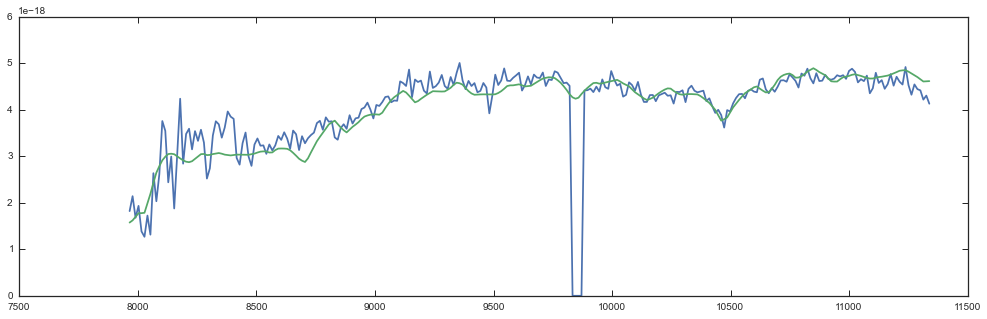

In [24]:
wv,fl,er=np.load('spec_stacks_jan24/s39170_ns_stack.npy')

mwv,mfl=np.load('../../../fsps_models_for_fit/galaxy_models/m0.025_a4.9_t0_z1.023_s39170_model.npy')
imfl=interp1d(mwv,mfl)(wv)
C=Scale_model(fl,er,imfl)

IDer = []
for ii in range(len(wv)):
    if 4855 * (1 + 1.023) <= wv[ii] <= 4880 * (1 + 1.023):
        IDer.append(ii)
er[IDer] = 1E8
fl[IDer] = 0
    

plt.figure(figsize=[17,5])
plt.plot(wv,fl)
plt.plot(wv,C*imfl)
# plt.plot(wv,er)
plt.show()
plt.close()

In [ ]:
%matplotlib inline
wv,fl,er=np.load('spec_stacks_jan24/s39170_ns_stack.npy')

mwv,mfl=np.load('../../../fsps_models_for_fit/galaxy_models/m0.025_a4.9_t0_z1.023_s39170_model.npy')
imfl=interp1d(mwv,mfl)(wv)
C=Scale_model(fl,er,imfl)

    

plt.figure(figsize=[17,5])
plt.plot(wv,fl)
plt.plot(wv,C*imfl)
# plt.plot(wv,er)
plt.show()
plt.close()

In [11]:
np.cov(fl,er)

array([[  5.21737071e-37,  -1.13176823e-37],
       [ -1.13176823e-37,   3.31719582e-38]])